# Chapter3: 데이터에 함수를 최적화시키는 방법

In [1]:
# 추가 라이브러리는 추후 필요에 따라 노트북에서 가져올 예정입니다. 이 라이브러리는 표준 라이브러리입니다.

import numpy as np  # 넘파이 라이브러리 불러오기 (수치 계산, 배열 조작, 선형대수 등에 강력한 기능 제공)
import seaborn as sns  # 시본 라이브러리 불러오기 (매력적이고 유용한 통계 그래프 제작 기능 제공)
import matplotlib.pyplot as plt  # 맷플롯립 라이브러리의 플롯 모듈 불러오기 (다양하고 유연한 시각화 기능 제공)


### 노이즈가 포함되어 있는 데이터에 함수를 피팅하는 것과 노이즈가 없는 데이터에 함수를 피팅하는 것의 비교.
데이터를 만드는데 $(x_i,y_i)$ 평균이 $\mu$ 이고 표준편차가 $\sigma$ 인 가우시안 함수에서 추출한 데이터에 균등 분포에서 추출한 노이즈를 더해 데이터를 만들어 보겠습니다. 
$$y=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}+noise.$$

Text(0, 0.5, 'y')

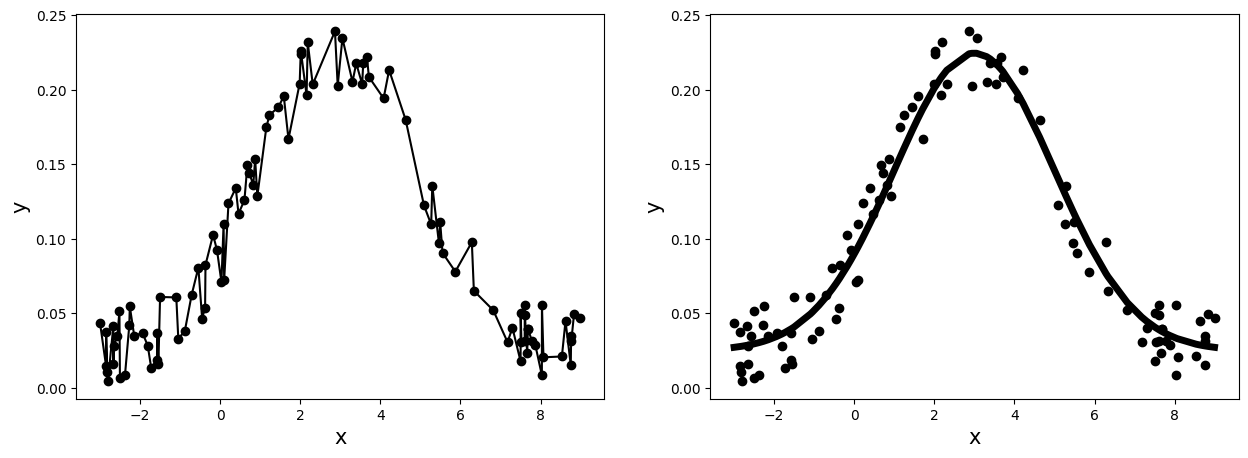

In [2]:
# 가우시안 함수와 노이즈를 활용하여 데이터 포인트 생성하기. 이는 시뮬레이션된 데이터입니다.
mu = 3  # 평균
sigma = 2  # 표준편차 

# 데이터 포인트의 (x,y) 생성하기
x = -3 + 12 * np.random.rand(100, 1)  # 100개의 난수 (x 좌표) 생성
# 위에서 임의로 생성된 포인트를 정렬합니다 
xx = np.sort(x, axis=None)
y = np.exp(-0.5 * (xx - mu)**2 / sigma**2) / (sigma * np.sqrt(2 * np.pi)) + 0.05 * np.random.rand(100,)  # 계산된 y 값에 약간의 노이즈 추가

# 일반 fitting 함수 공식
z = 0.025 + np.exp(-0.5 * (xx - mu)**2 / sigma**2) / (sigma * np.sqrt(2 * np.pi))  # 노이즈가 없는 이상적인 함수

# 플로팅 (시각화)
fig, subs = plt.subplots(1, 2, figsize=(15, 5))  # 1행 2열의 서브플롯 구성

# 첫 번째 fitting 함수는 데이터 포인트를 선형 보간하여 첫 번째 subplot에 표현
subs[0].plot(xx, y, 'ko', xx, y, 'k-')  # 검정색 동그라미(데이터 포인트)와 검정색 선(보간 결과)
subs[0].set_xlabel('x', fontsize=15)
subs[0].set_ylabel('y', fontsize=15)

# 두 번째 서브플롯에 데이터 포인트와 일반 fitting 함수 표현 
subs[1].plot(xx, y, 'ko')  # 검정색 동그라미(데이터 포인트)
subs[1].plot(xx, z, 'k', linewidth=5)  # 검정색 굵은 선(fitting 함수)
subs[1].set_xlabel('x', fontsize=15)
subs[1].set_ylabel('y', fontsize=15)

#  그림을 저장합니다 
# plt.savefig("Fig_noise_fit_regular_fit.png")


### 함수 $|x|$와 함수 $|x|^2$를 그려보겠습니다.

Text(0, 0.5, '$|x|^2$')

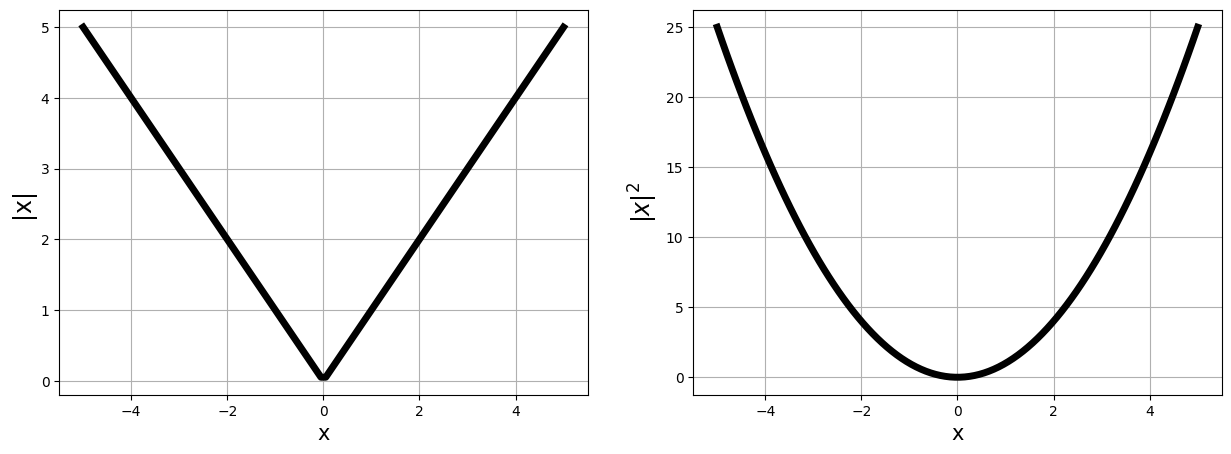

In [3]:
x=np.linspace(-5,5,100)
y_abs=np.abs(x)
y_square=x**2
fig, subs = plt.subplots(1,2,figsize=(15,5))
subs[0].grid()
subs[0].plot(x,y_abs,'k',linewidth=5)
subs[0].set_xlabel('x',fontsize=15)
subs[0].set_ylabel('|x|',fontsize=17)
subs[1].grid()
subs[1].plot(x,y_square,'k',linewidth=5)
subs[1].set_xlabel('x',fontsize=15)
subs[1].set_ylabel('$|x|^2$',fontsize=17)

# plt.savefig("Fig_abs_x_square_x.png")

### 특이점이 있는 함수

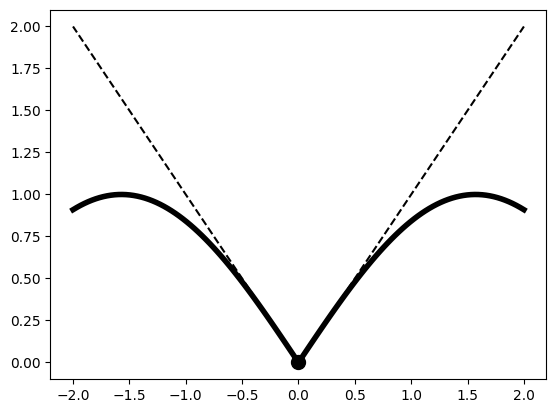

In [4]:
x=np.linspace(-2,2,120)
y=np.abs(np.sin(x))
plt.plot(x,y,'k',linewidth=4)

x1=np.linspace(0,2,60)
y1=x1
plt.plot(x1,y1,'k--')
plt.plot(-x1,y1,'k--')
plt.plot(0,0,'ko',markersize=10)

# plt.savefig('Fig_singularity_tangents')

### $f(\omega)=0$를 푸는데 f가 비선형이면 매우 어렵다.

다음을 만족하는 $\omega$를 찾아봅시다.$$0.002\sin(\omega)-2\omega^2+e^{\omega}=0$$

그래프를 보면 대략적인 그 해를 확인할 수 있다.

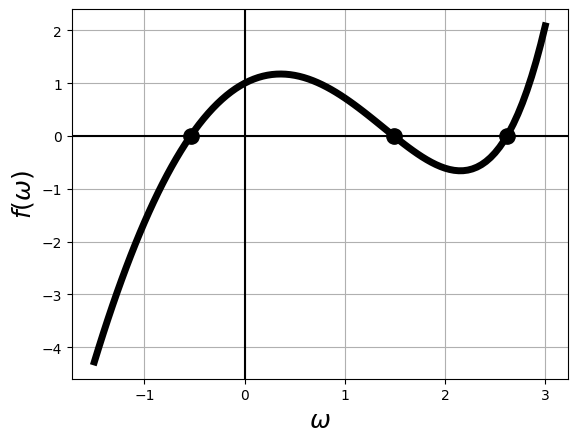

In [5]:
w = np.linspace(-1.5, 3, 100)  # -1.5에서 3 사이의 100개 점 생성 (w 값)
y = 0.002 * np.sin(w) - 2 * w**2 + np.exp(w)  # 주어진 함수 계산  (y 값) 
plt.plot(w, y, 'k', linewidth=5)  # 검은색 굵은 선으로 함수 그래프 표현  
plt.grid()  # 격자 보이기
plt.xlabel('$\omega$', fontsize=18)  # x축 라벨 (오메가)
plt.ylabel('$f(\omega)$', fontsize=18)  # y축 라벨
plt.axhline(y=0, color='k')  # 검은색으로 x축 표시
plt.axvline(x=0, color='k')  # 검은색으로 y축 표시

# 대략적인 근(roots) 표시하기
plt.plot(1.489, 0, 'k.', markersize=22)  # 근의 위치에 검은색 큰 점
plt.plot(-0.539, 0, 'k.', markersize=22)
plt.plot(2.618, 0, 'k.', markersize=22)

# plt.savefig("Fig_roots_f_nonlinear.png")  # 그림 저장


### 구간 $[-1,6]$에서 함수 $f(\omega)=3+(0.5\omega-2)^2$ 의 최솟값을 구해보자.

Text(0.9, 6, 'minimizer of $f(\\omega)$ is at $\\omega$=4')

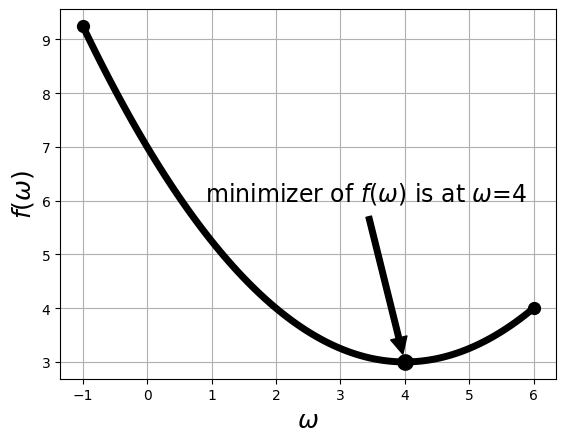

In [6]:
w = np.linspace(-1, 6, 100)  # -1에서 6 사이의 100개 점 생성
y = 3 + (0.5 * w - 2)**2  # 주어진 함수 계산 
plt.plot(w, y, 'k', linewidth=5)  # 검은색 굵은 선으로 그래프 그리기
plt.grid()  # 격자 보이기 
plt.xlabel('$\omega$', fontsize=18)  # x축 라벨 (오메가)
plt.ylabel('$f(\omega)$', fontsize=18)  # y축 라벨 

# 최소화 지점 강조하기
plt.plot(4, 3, 'k.', markersize=22)  # 검은색 큰 점

# 경계 지점 강조하기
plt.plot(-1, 9.25, 'k.', markersize=17)  # 검은색 점
plt.plot(6, 4, 'k.', markersize=17)  # 검은색 점

# 그래프에 주석 추가하기
plt.annotate('minimizer of $f(\omega)$ is at $\omega$=4', xy=(4, 3), xytext=(0.9, 6),
             arrowprops=dict(facecolor='k', shrink=0.05), fontsize='17')  # 주석과 화살표 표시 

# plt.savefig("Fig_minimize_f.png")  # 그림 저장


# 로지스틱 함수 $\sigma(s)=\frac{1}{1+e^{-s}}$를 그려보자.

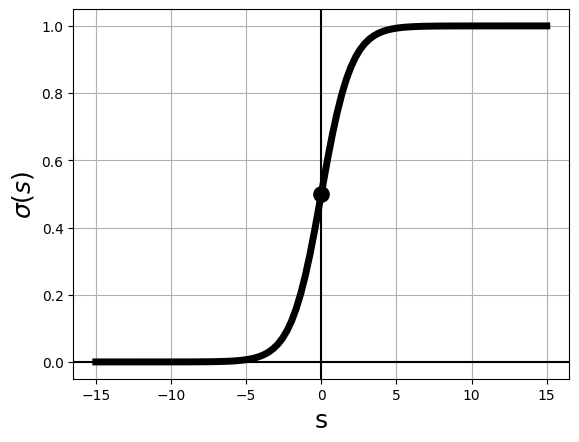

In [7]:
s = np.linspace(-15, 15, 100)  # -15에서 15 사이에 균일하게 분포된 값 100개로 이루어진 배열 생성
sigma = 1 / (1 + np.exp(-s))  # 로지스틱 시그모이드 함수 계산
plt.plot(s, sigma, 'k', linewidth=5)  # 검은색 굵은 선으로 함수 그래프 표현
plt.grid()  # 격자 보이기
plt.xlabel('s', fontsize=18)  # x축 라벨
plt.ylabel('$\sigma(s)$', fontsize=18)  # y 축 라벨
plt.axhline(y=0, color='k')  # 검은색으로 x축 표시
plt.axvline(x=0, color='k')  # 검은색으로 y축 표시

plt.plot(0, 0.5, 'k.', markersize=22)  # (0, 0.5) 위치에 검은색 큰 점

plt.savefig("Fig_logistic.png")  # 그림 저장


### 구간 (0,1)에 대해 함수 $f(s)=-\log(s)$ and $g(s)=-\log(1-s)$를 그려보자. 이러한 함수는 분류 태스크에 많이 사용되며, 교차 엔트로피 손실 함수에서 확인할 수 있다.

Text(0, 0.5, '$-log(1-s)$')

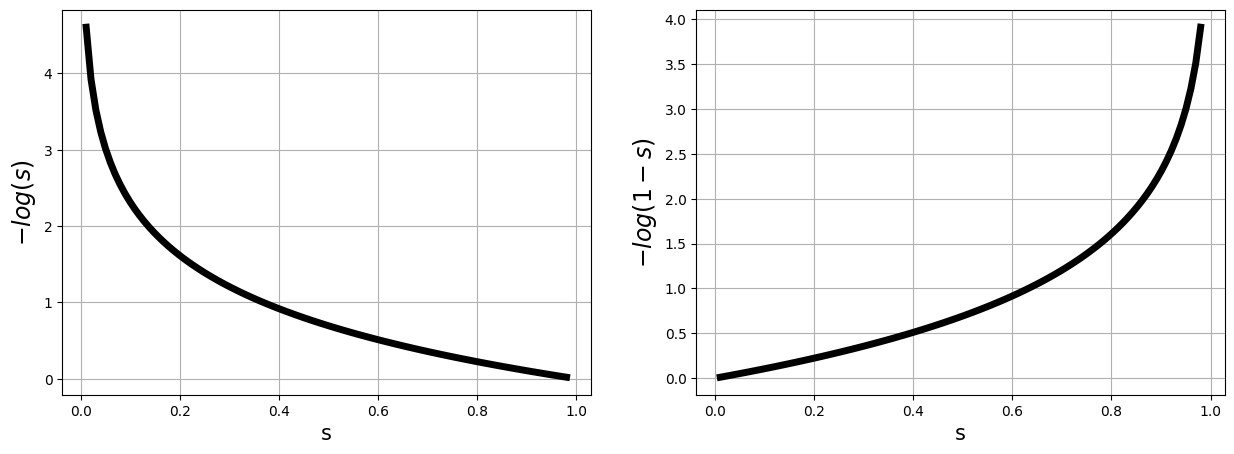

In [8]:
s=np.linspace(0.01,0.98,100)
f=-np.log(s)
g=-np.log(1-s)

fig, subs = plt.subplots(1,2,figsize=(15,5))
subs[0].grid()
subs[0].plot(s,f,'k',linewidth=5)
subs[0].set_xlabel('s',fontsize=15)
subs[0].set_ylabel('$-log(s)$',fontsize=17)
subs[1].grid()
subs[1].plot(s,g,'k',linewidth=5)
subs[1].set_xlabel('s',fontsize=15)
subs[1].set_ylabel('$-log(1-s)$',fontsize=17)

# plt.savefig("Fig_log_s_log_1_s.png")

### 볼록 함수를 살펴보자.

Text(0.5, 0, '$z=f(\\omega_1,\\omega_2)$')

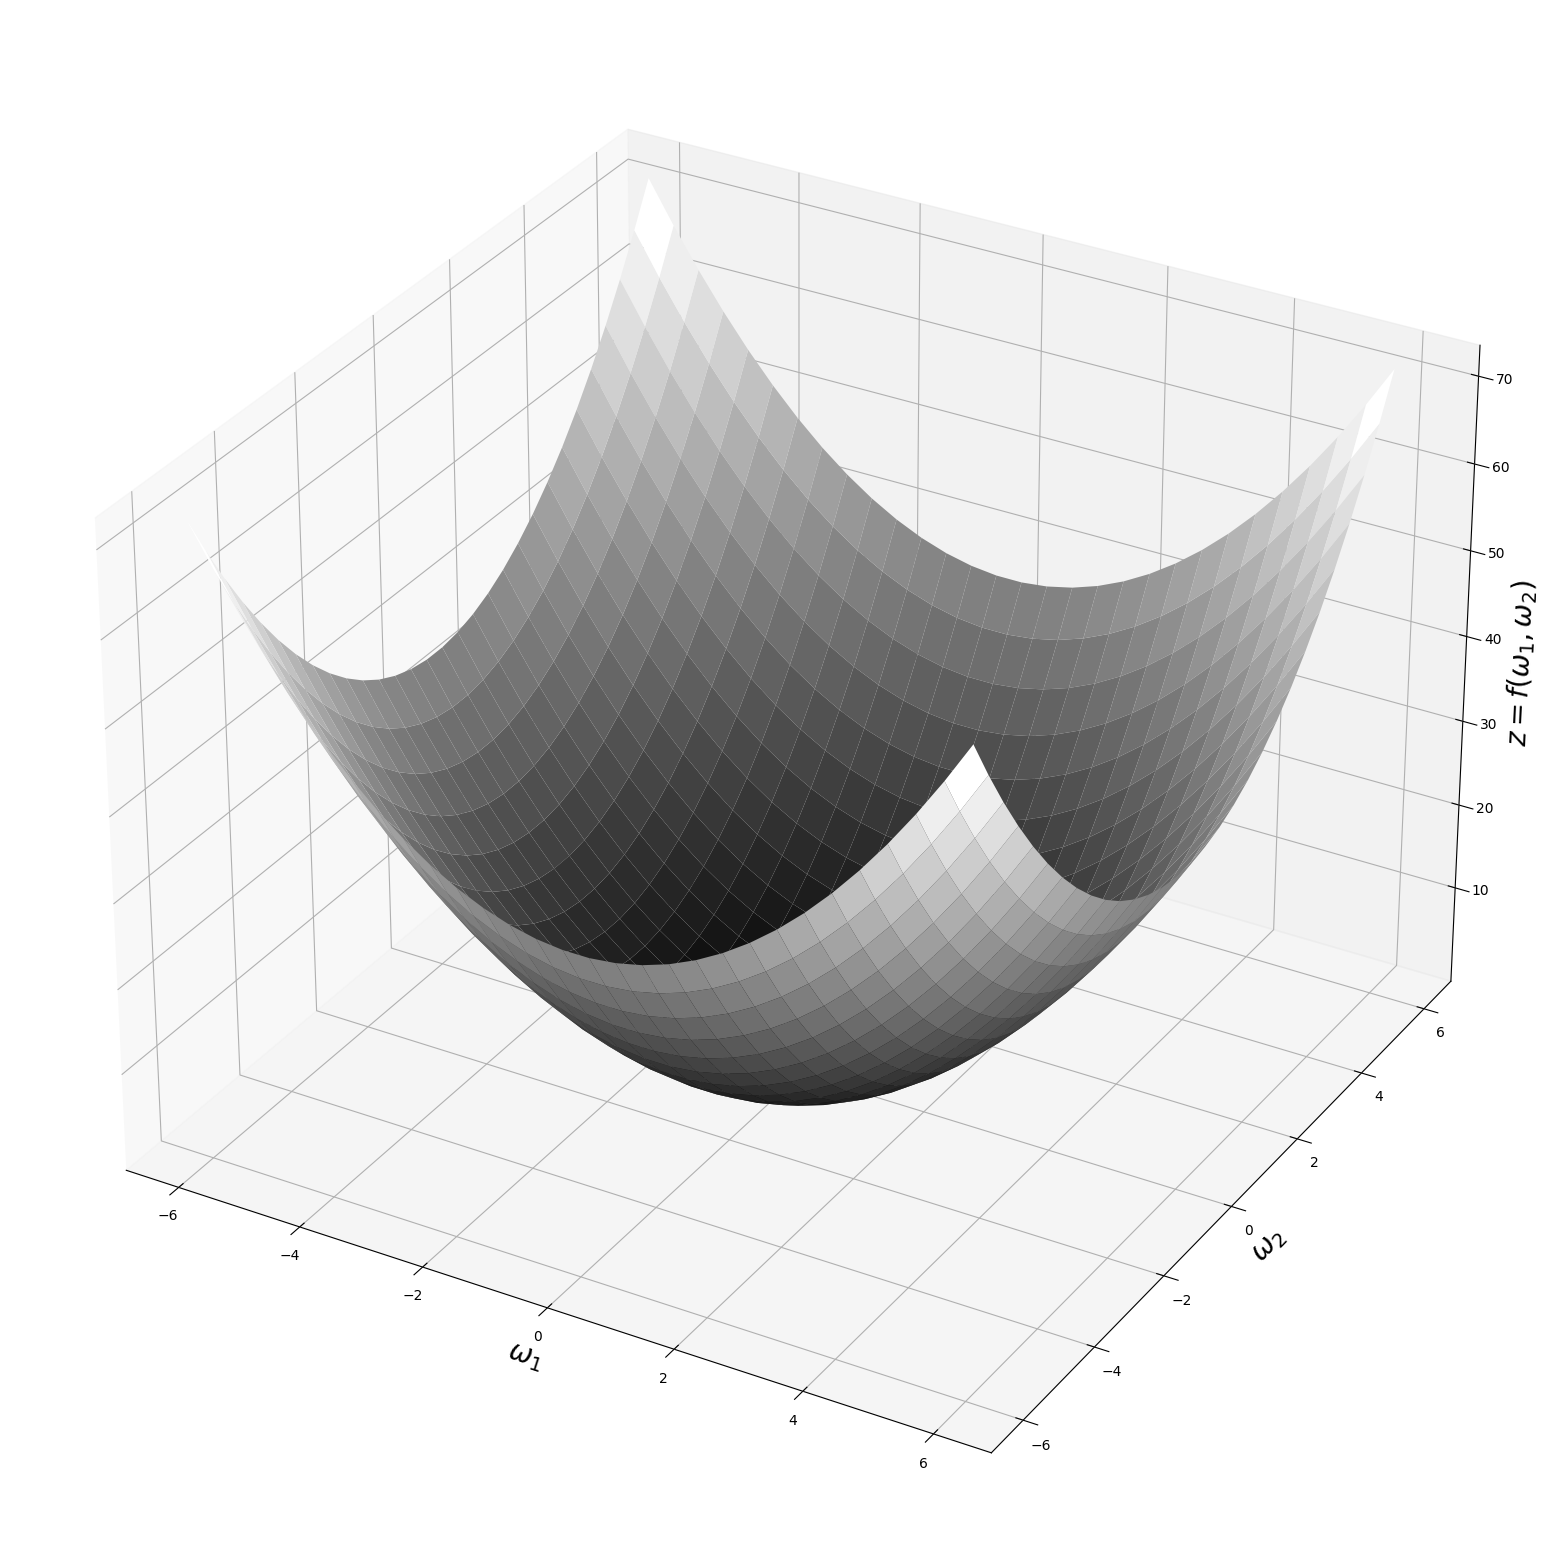

In [9]:
# 그래프를 그릴 이변수 함수의 공식
def f(x, y):
    return x**2 + y**2

# numpy.linspace를 이용해 x, y 격자점 생성
x = np.linspace(-6, 6, 30) 
y = np.linspace(-6, 6, 30)

# 이차원 격자 생성하기
X, Y = np.meshgrid(x, y) 

# Z = f(격자 내의 각 지점)
Z = f(X, Y)

# Z 값 시각화  
picture = plt.figure(figsize=(20, 20))
picture = plt.axes(projection='3d') 
#picture.contour3D(X, Y, Z, 30) # cmap=인수를 사용해서 색상표(colormap)을 지정할 수 있습니다.
picture.plot_surface(X, Y, Z, cmap='gist_gray')  # 곡면 그래프 생성

# 축 라벨 설정
picture.set_xlabel('$\omega_1$', fontsize=20) 
picture.set_ylabel('$\omega_2$', fontsize=20)
picture.set_zlabel('$z=f(\omega_1,\omega_2)$', fontsize=20)

# 이미지 타이틀 설정 (주석 처리됨)
#picture.set_title('Landscape of a Convex Function', fontsize=13) 

# plt.savefig("Fig_convex_landscape.png") # 그림 저장


### 볼록 함수가 아닌 그래프에서는 피크와 밸리가 있습니다.

Text(0.5, 0, '$z=f(\\omega_1,\\omega_2)$')

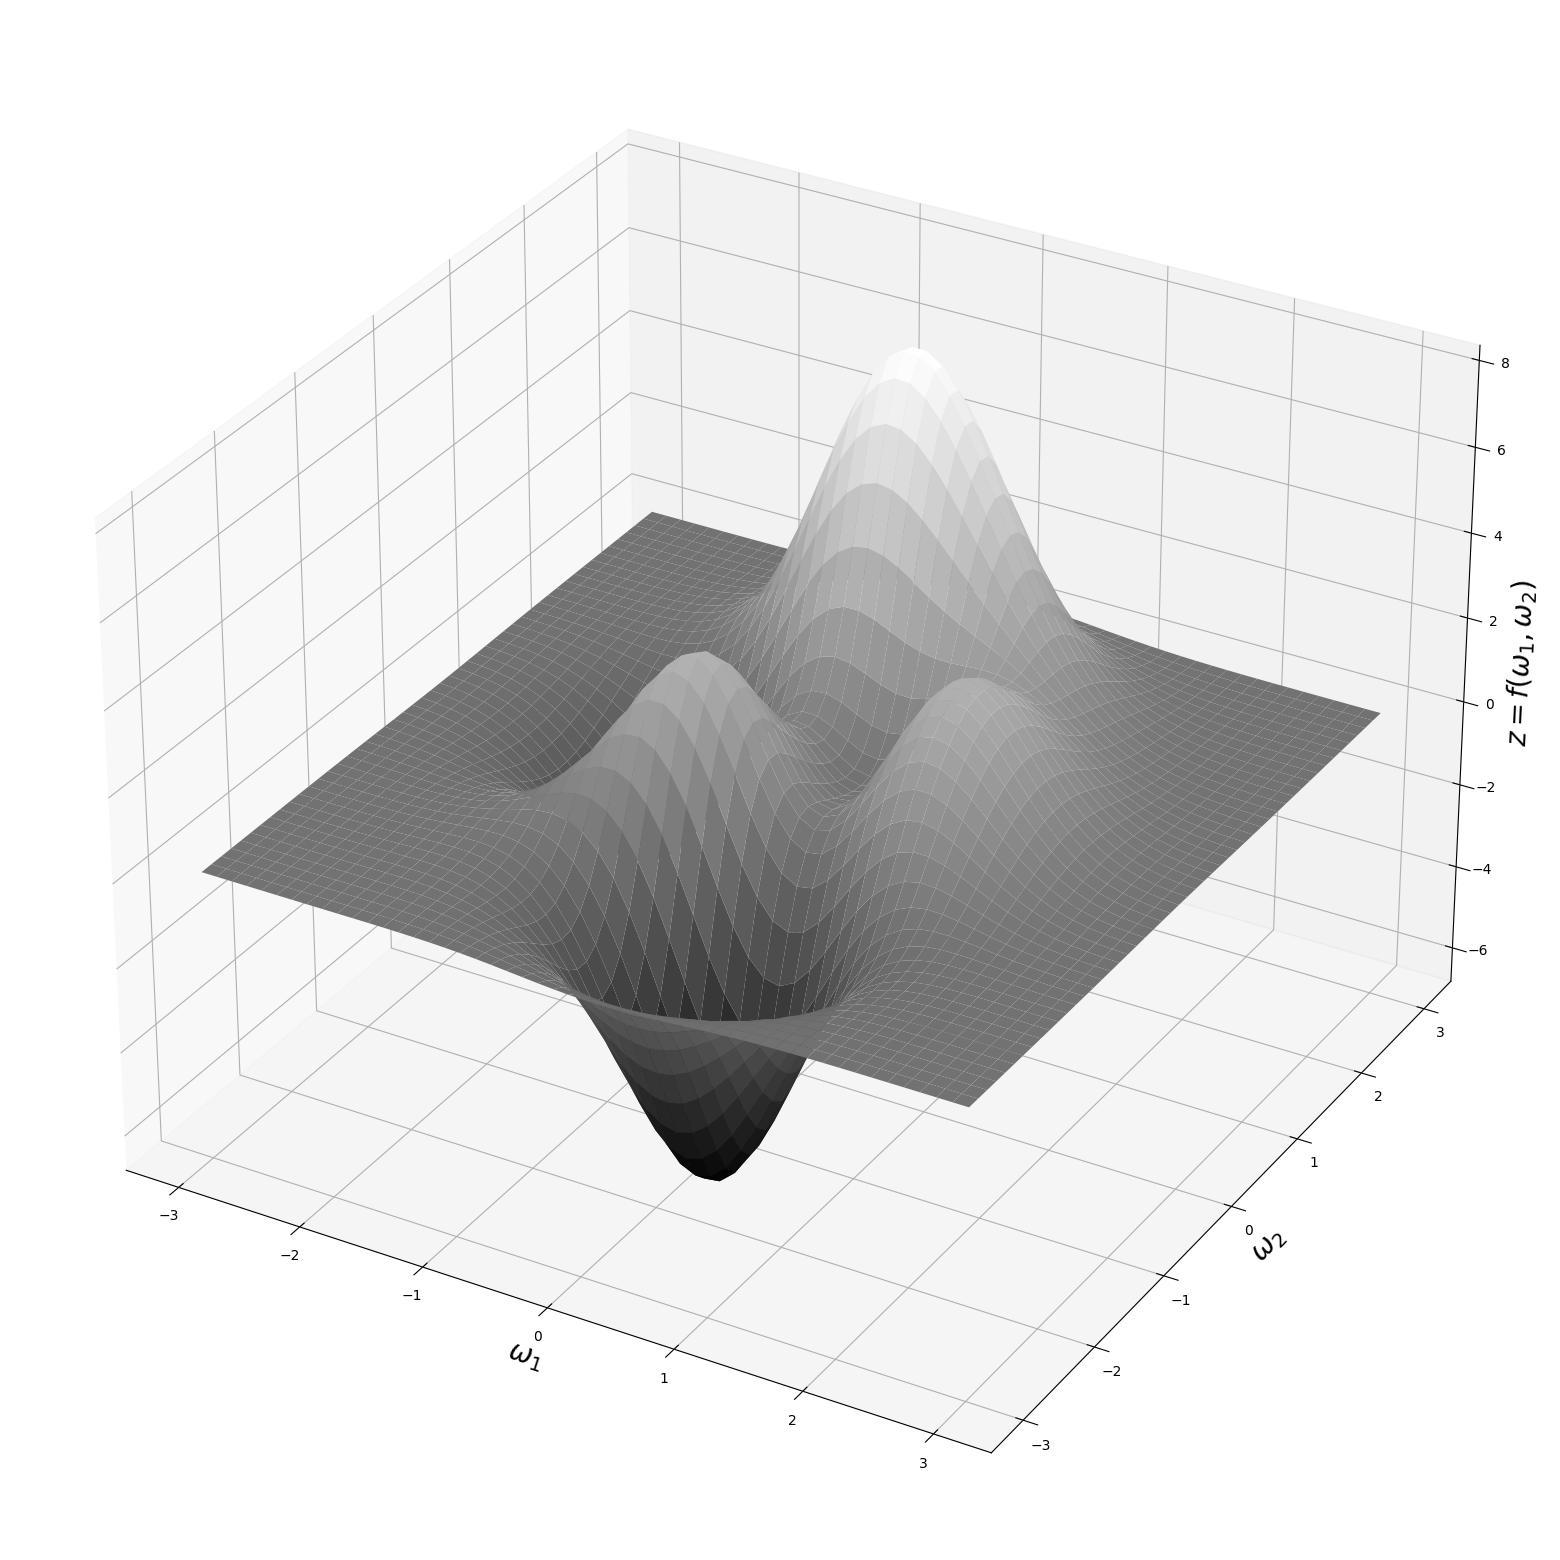

In [10]:
# 그려질 이변수 함수 공식 
def f(x, y):
    return 3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2) - 10 * (x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) - np.exp(-(x + 1)**2 - y**2) / 3

# numpy.linspace로 x, y 격자점 생성하기
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)

# 이차원 격자 생성하기
X, Y = np.meshgrid(x, y)

# Z = f(격자 내의 각 지점)
Z = f(X, Y)

# Z 값 시각화  
picture = plt.figure(figsize=(20, 20))
picture = plt.axes(projection='3d') 
#picture.contour3D(X, Y, Z, 30) # cmap=인수를 사용해서 색상표(colormap)을 지정할 수 있습니다.
picture.plot_surface(X, Y, Z, cmap='gist_gray')  # 곡면 그래프 생성

# 축 라벨 설정
picture.set_xlabel('$\omega_1$', fontsize=20) 
picture.set_ylabel('$\omega_2$', fontsize=20)
picture.set_zlabel('$z=f(\omega_1,\omega_2)$', fontsize=20)

# 이미지 타이틀 설정 (주석 처리됨)
#picture.set_title('Landscape of a Non-Convex Function', fontsize=13) 

# plt.savefig("Fig_nonconvex_landscape.png") # 그림 저장


### 생선의 무게 예측하기: 캐글 데이터셋을 활용합니다. [캐글 데이터셋](https://www.kaggle.com/datasets/vipullrathod/fish-market)
미리 받아둔 Fish.csv데이터를 활용합니다.

In [11]:
import pandas as pd

fish_market_df=pd.read_csv('data/Fish.csv')

In [12]:
fish_market_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [13]:
# 위 데이터 프레임 헤더를 책 장에서 사용할 이미지로 저장합니다.
# dataframe_image 라이브러리를 pip install dataframe-image 명령으로 설치해야 합니다.

# 필요시 다음 주석을 풀고 라이브러리를 설치하세요.
# !pip3 install dataframe-image

df = fish_market_df.head()
import dataframe_image as dfi
dfi.export(df, 'Fig_fish_data.png')



### 수산 시장 데이터셋 살펴보기

In [14]:
fish_market_df.info()
fish_market_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [15]:
# 카테고리가 몇 개이고 각 카테고리가 몇 개 있는지 살펴보자
fish_market_df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

array([[<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Length1'}>],
       [<Axes: title={'center': 'Length2'}>,
        <Axes: title={'center': 'Length3'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Width'}>]], dtype=object)

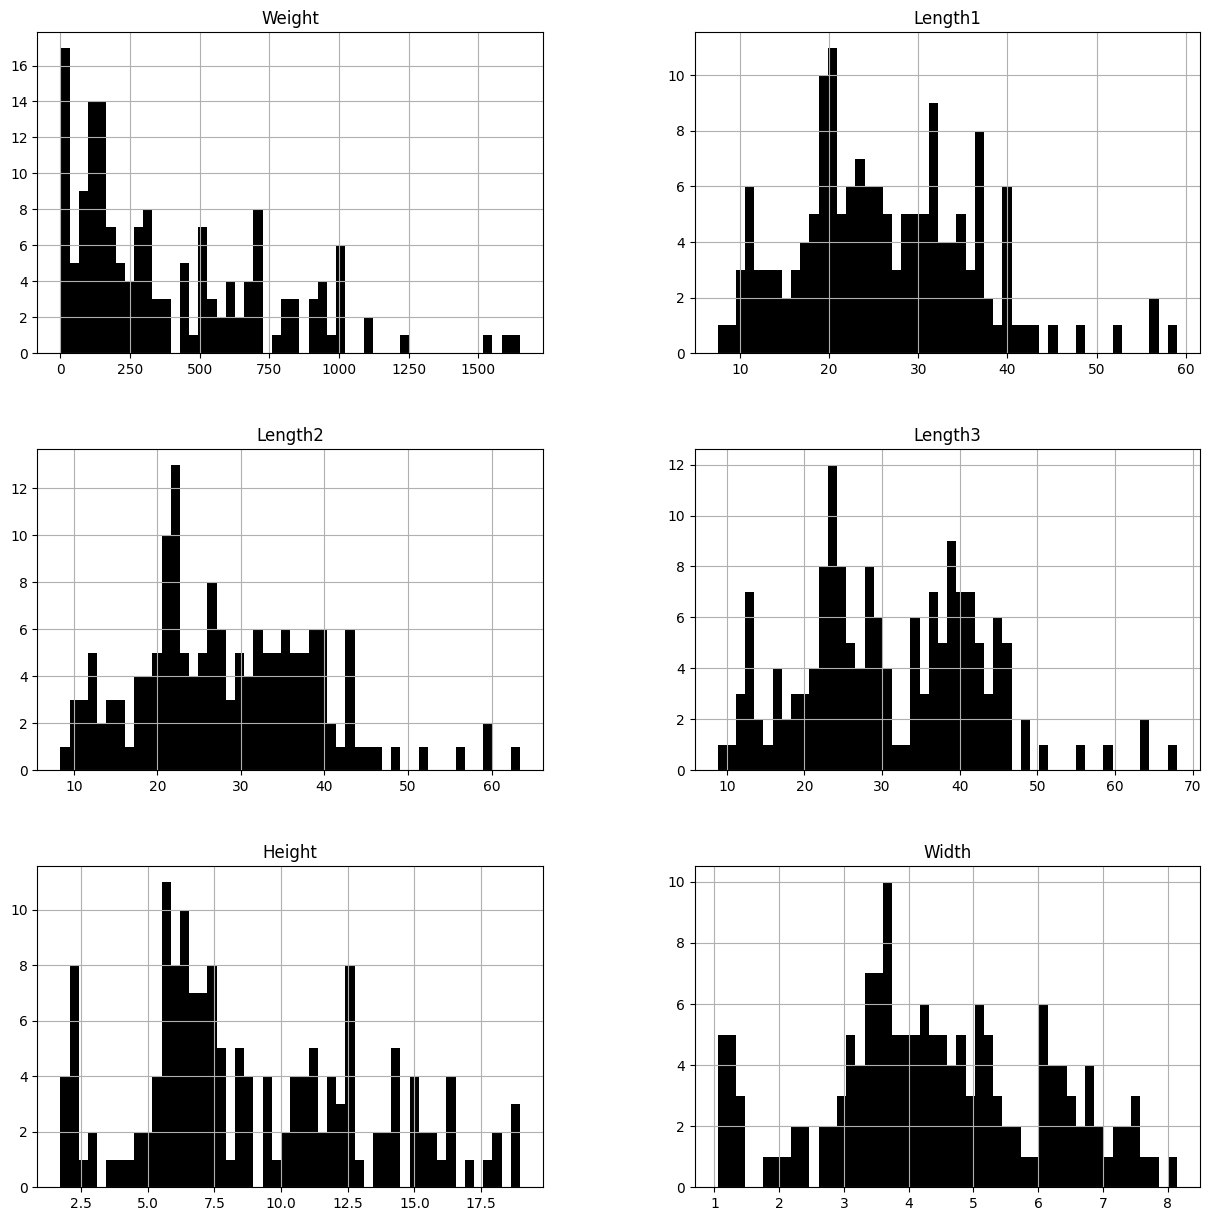

In [16]:
# 히스토그램을 찍어봅니다.
fish_market_df.hist(bins=50, figsize=(15,15), color='black')

### 원본 데이터 셋을 학습 및 테스트 셋으로 분할 합니다. (scikit-learn 라이브러리를 사용합니다.)
테스트 셋이 데이터의 실제 비율을 대표할 수 있도록 샘플링합니다. 이렇게 하지 않으면 샘플링 오류가 발생하고 테스트셋이 원 데이터를 잘 나타내지 못합니다.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

# 계층화된 셔플 분할을 위해 StratifiedShuffleSplit 생성
data_split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=30)

# fish_market_df 데이터와 종(Species) 레이블에 대해 분할 수행 
for train_index, test_index in data_split.split(fish_market_df, fish_market_df['Species']):
    strat_train_set = fish_market_df.loc[train_index]  # 훈련 세트용 데이터프레임
    strat_test_set = fish_market_df.loc[test_index]   # 테스트 세트용 데이터프레임

# 테스트 서브셋에서 생선 종의 비율 확인
print('테스트 데이터 서브셋에서의 생선 종 비율:')
strat_test_set['Species'].value_counts() / len(strat_test_set)


테스트 데이터 서브셋에서의 생선 종 비율:


Species
Perch        0.34375
Bream        0.21875
Roach        0.12500
Pike         0.12500
Smelt        0.09375
Parkki       0.06250
Whitefish    0.03125
Name: count, dtype: float64

In [18]:
print("원본 데이터 셋에 포함된 생선 종 비율: ")
fish_market_df['Species'].value_counts()/len(fish_market_df)

원본 데이터 셋에 포함된 생선 종 비율: 


Species
Perch        0.352201
Bream        0.220126
Roach        0.125786
Pike         0.106918
Smelt        0.088050
Parkki       0.069182
Whitefish    0.037736
Name: count, dtype: float64

### 이제 훈련 데이터 셋을 살펴보자. 피처와 대상 레이블(가중치) 사이에 명백한 관계 (상관관계 등)가 있는지 살펴봅니다.

In [ ]:
# 훈련 서브셋에서 각 특징 쌍 간의 상관 관계 계산

correlation_matrix = strat_train_set.corr()

# 이제 각 길이 특징과 목표 특징(생선 무게)의 상관 관계 확인
correlation_matrix['Weight']

# 길이 특징과 무게 사이에 강한 양의 선형 상관관계가 있음을 나타내는 1에 가까운 값들을 확인합니다.


In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(strat_train_set,figsize=(17,17),color='black')

plt.savefig('Fig_weight_lengths_scatterplots')

print('\n The full correlation matrix:\n\n',correlation_matrix)
# dfi.export(correlation_matrix,'Fig_fish_corr_matrix.png')

### 훈련 데이터에 대해 다양한 모델을 시험해 봅시다.
1. 선형 회귀: scikit-learn의 선형 회귀 모델을 이용하여 훈련 데이터를 선형 회귀 모델에 맞춰보고, 5개의 길이 특징을 사용해 무게 특징을 예측해 봅시다.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np  # np 임포트

# 수치형 특징 분리 및 목표 특징 제거
fish_market_num = strat_train_set.drop({'Species', 'Weight'}, axis=1)
# 레이블 특징 분리
fish_market_label = strat_train_set['Weight']

# 선형 회귀 모델 생성 
model = LinearRegression()
# 모델을 훈련 데이터에 적합 
model.fit(fish_market_num, fish_market_label)

# omega 값 출력
print('\nScikit-learn Linear Regression을 사용한 omega 값\n\n', model.intercept_, model.coef_)

# 훈련 서브셋에서 선형 회귀 모델의 평균 제곱 오차(MSE) 계산
predicted_weight_training = model.predict(fish_market_num)
mse_train = mean_squared_error(fish_market_label, predicted_weight_training)

print('\n훈련 세트에 대한 평균 제곱 오차(MSE)=', mse_train)

# 평균 제곱 오차의 제곱근(RMSE) 계산
root_mean_squared_error_train = np.sqrt(mse_train)
print('\n훈련 세트에 대한 평균 제곱근 오차(RMSE)=', root_mean_squared_error_train)



Scikit-learn Linear Regression을 사용한 omega 값

 -475.1992913010974 [ 82.84970118 -28.85952426 -28.50769512  29.82981435  30.97250278]

훈련 세트에 대한 평균 제곱 오차(MSE)= 13340.703647147182

훈련 세트에 대한 평균 제곱근 오차(RMSE)= 115.50196382376873


### scikit-learn의 내장 선형 회귀 모델 대신 해석적 방법 사용하기

$$\vec{ω}= (X^tX)^{−1}X^t\vec{y}_{true}$$

위 식에서:
$X$ 는 레이블 피처를 제외한 모든 훈련 피처(5개의 길이 피처)를 포함하는 행렬이고, 첫 번째 열에 1로 구성된 벡터가 더해진다.
$\vec{y}_{true}$ 는 레이블 피처이다.

$\vec{ω}$를 계산한 후, 다음 예측 함수를 사용해 무게를 예측한다.

$$y_{predict} = ω_0 +\omega_1 x_1 +\omega_2x_2 +\omega_3x_3 +\omega_4x_4 +\omega_5x_5$$

In [22]:
X = strat_train_set.drop({'Species', 'Weight'}, axis=1)  # 레이블 특징인 'Species'와 'Weight' 제외한 모든 훈련 특징 추출
y_true = fish_market_label  # 레이블 특징인 'Weight' 저장

# 확인:
X.head()  # 데이터프레임의 상위 5개 행 출력


,Length1,Length2,Length3,Height,Width
109,30.5,32.8,34.0,10.0300,6.0180
133,36.0,38.5,41.0,6.3960,3.9770
5,26.8,29.7,34.7,13.6024,4.9274
114,34.5,37.0,39.4,10.8350,6.2646
72,7.5,8.4,8.8,2.1120,1.4080


In [23]:
# X를 pandas 데이터프레임에서 NumPy 배열로 변환
X_array = X.to_numpy()  
y_true_array = y_true.to_numpy()

# X_array의 형상 확인
shape_X = X_array.shape
# shape_X[0] 행, 1열 크기의 1로 구성된 벡터 생성
ones_vec = np.ones((shape_X[0], 1))

# 1의 벡터와 X_array를 열 방향으로 결합
X_conc = np.concatenate((ones_vec, X_array), axis=1) 

# X_conc 전치행렬 계산
Xt = X_conc.T 

# 행렬 연산을 통해 A와 b 계산
A = np.linalg.inv(Xt.dot(X_conc))
b = Xt.dot(y_true_array)

# 해석적 공식을 사용해 omega 계산
omega = A.dot(b)
print('\n해석적 해법을 사용한 omega 값:\n\n', omega)

# 유사 역행렬을 사용해 omega 계산
omega_1 = (np.linalg.pinv(X_conc)).dot(y_true_array)
print('\n유사 역행렬을 사용한 omega 값:\n\n', omega_1)



해석적 해법을 사용한 omega 값:

 [-475.1992913    82.84970118  -28.85952426  -28.50769512   29.82981435
   30.97250278]

유사 역행렬을 사용한 omega 값:

 [-475.1992913    82.84970118  -28.85952426  -28.50769512   29.82981435
   30.97250278]


In [24]:
# 전체 훈련 데이터 세트에 대한 예측 수행  
Y_predict = X_conc.dot((omega.T))  

# 훈련 데이터 세트에 대한 평균 제곱 오차(MSE) 계산
m = X_array.shape[0]

# 해석적 공식을 사용한 MSE
mse_train_analytical = mean_squared_error(y_true_array, Y_predict)
Loss = ((Y_predict - y_true_array).T).dot(Y_predict - y_true_array) / m

print('\n훈련 세트에 대한 평균 제곱 오차(손실 함수를 위한 해석적 공식 사용)=\n', Loss)
print('\n훈련 세트에 대한 평균 제곱 오차(Scikit-learn 사용)=', mse_train_analytical)

# 평균 제곱 오차의 제곱근(RMSE) 계산
root_mean_squared_error_train_analytical = np.sqrt(mse_train_analytical)
print('훈련 세트에 대한 평균 제곱근 오차(RMSE)(해석적 해법 사용)=', root_mean_squared_error_train_analytical)



훈련 세트에 대한 평균 제곱 오차(손실 함수를 위한 해석적 공식 사용)=
 13340.703647147177

훈련 세트에 대한 평균 제곱 오차(Scikit-learn 사용)= 13340.70364714718
훈련 세트에 대한 평균 제곱근 오차(RMSE)(해석적 해법 사용)= 115.50196382376873


> **참고: 평균 제곱 오차(MSE)는 훈련 데이터에서도 상당히 큽니다. 하지만 이는 데이터의 양이 충분하지 않고, 범주형 특징(생선의 종류)를 모델에서 사용하지 않았기 때문입니다. 범주형 특징을 활용하면 도움이 되었을 것입니다. 이 부분은 이후의 챕터와 더 큰 데이터 세트에서 다루도록 하겠습니다. 이 예제를 마치기 전에 테스트 세트에 대해 평균 제곱 오차(MSE)를 계산해 보겠습니다.** 

In [25]:
# 테스트 세트에서 수치형 특징 분리 및 목표 특징 제거
fish_market_num_test = strat_test_set.drop({'Species', 'Weight'}, axis=1)
# 테스트 세트에서 레이블 특징 분리
fish_market_label_test = strat_test_set['Weight']

# 테스트 세트에 대한 예측 수행
predicted_weight_test = model.predict(fish_market_num_test)

# 테스트 세트에 대한 평균 제곱 오차(MSE) 계산
mse_test = mean_squared_error(fish_market_label_test, predicted_weight_test)
print('\n테스트 세트에 대한 평균 제곱 오차(MSE)=', mse_test)

# 테스트 세트에 대한 평균 제곱근 오차(RMSE) 계산
root_mean_squared_error_test = np.sqrt(mse_test)
print('\n테스트 세트에 대한 평균 제곱근 오차(RMSE)=', root_mean_squared_error_test)

# 테스트 세트에 대한 R^2 점수 계산
from sklearn.metrics import r2_score
print('\n$R^2$ 점수=', r2_score(fish_market_label_test, predicted_weight_test))



테스트 세트에 대한 평균 제곱 오차(MSE)= 20872.533106660874

테스트 세트에 대한 평균 제곱근 오차(RMSE)= 144.47329547934066

$R^2$ 점수= 0.8711413402357489


> **참고: $R^2$ 점수는 모델의 적합도(goodness of fit)를 측정합니다. 적합도를 평가하는 다른 통계 지표로는 잔차 플롯(residual plot) 관련 지표 등이 있습니다.**

### 2. 회귀 의사결정 나무: 같은 생선 시장 데이터세트에 3개 층의 회귀 의사결정 나무를 적합시켜보세요. 이 모델은 테스트 서브셋에서 더 나은 성능을 보입니다.

In [26]:
from sklearn.tree import DecisionTreeRegressor

# 회귀 의사결정 나무 모델 생성 
reg_tree_model = DecisionTreeRegressor(max_depth=3, min_samples_split=5) 

# 모델을 훈련 데이터에 적합 
reg_tree_model.fit(fish_market_num, fish_market_label)

# 훈련 데이터 세트에 대한 예측 수행 
predicted_weight_training_tree = reg_tree_model.predict(fish_market_num)

# 훈련 세트에 대한 평균 제곱 오차(MSE) 계산
mse_train_tree = mean_squared_error(fish_market_label, predicted_weight_training_tree)
print('\n회귀 의사결정 나무를 사용한 훈련 세트에 대한 평균 제곱 오차(MSE)=', mse_train_tree)

# 훈련 세트 평균 제곱근 오차(RMSE) 계산
root_mean_squared_error_train_tree = np.sqrt(mse_train_tree)
print('\n회귀 의사결정 나무를 사용한 훈련 세트에 대한 평균 제곱근 오차(RMSE)=', root_mean_squared_error_train_tree)

# 테스트 데이터 세트에 대한 예측 수행 
predicted_weight_test_tree = reg_tree_model.predict(fish_market_num_test)

# 테스트 세트에 대한 평균 제곱 오차(MSE) 계산
mse_test_tree = mean_squared_error(fish_market_label_test, predicted_weight_test_tree)
print('\n회귀 의사결정 나무를 사용한 테스트 세트에 대한 평균 제곱 오차(MSE)=', mse_test_tree)

# 테스트 세트에 대한 평균 제곱근 오차(RMSE) 계산
root_mean_squared_error_test_tree = np.sqrt(mse_test_tree)
print('\n회귀 의사결정 나무를 사용한 테스트 세트에 대한 평균 제곱근 오차(RMSE)=', root_mean_squared_error_test_tree)

# 테스트 세트에 대한 R^2 점수 계산
print('\n$R^2$ 점수 =', r2_score(fish_market_label_test, predicted_weight_test_tree))



회귀 의사결정 나무를 사용한 훈련 세트에 대한 평균 제곱 오차(MSE)= 5689.04584449305

회귀 의사결정 나무를 사용한 훈련 세트에 대한 평균 제곱근 오차(RMSE)= 75.42576379787646

회귀 의사결정 나무를 사용한 테스트 세트에 대한 평균 제곱 오차(MSE)= 14794.200314752932

회귀 의사결정 나무를 사용한 테스트 세트에 대한 평균 제곱근 오차(RMSE)= 121.63141171076217

$R^2$ 점수 = 0.9086665324663175


### 회귀 의사 결정 트리 시각화

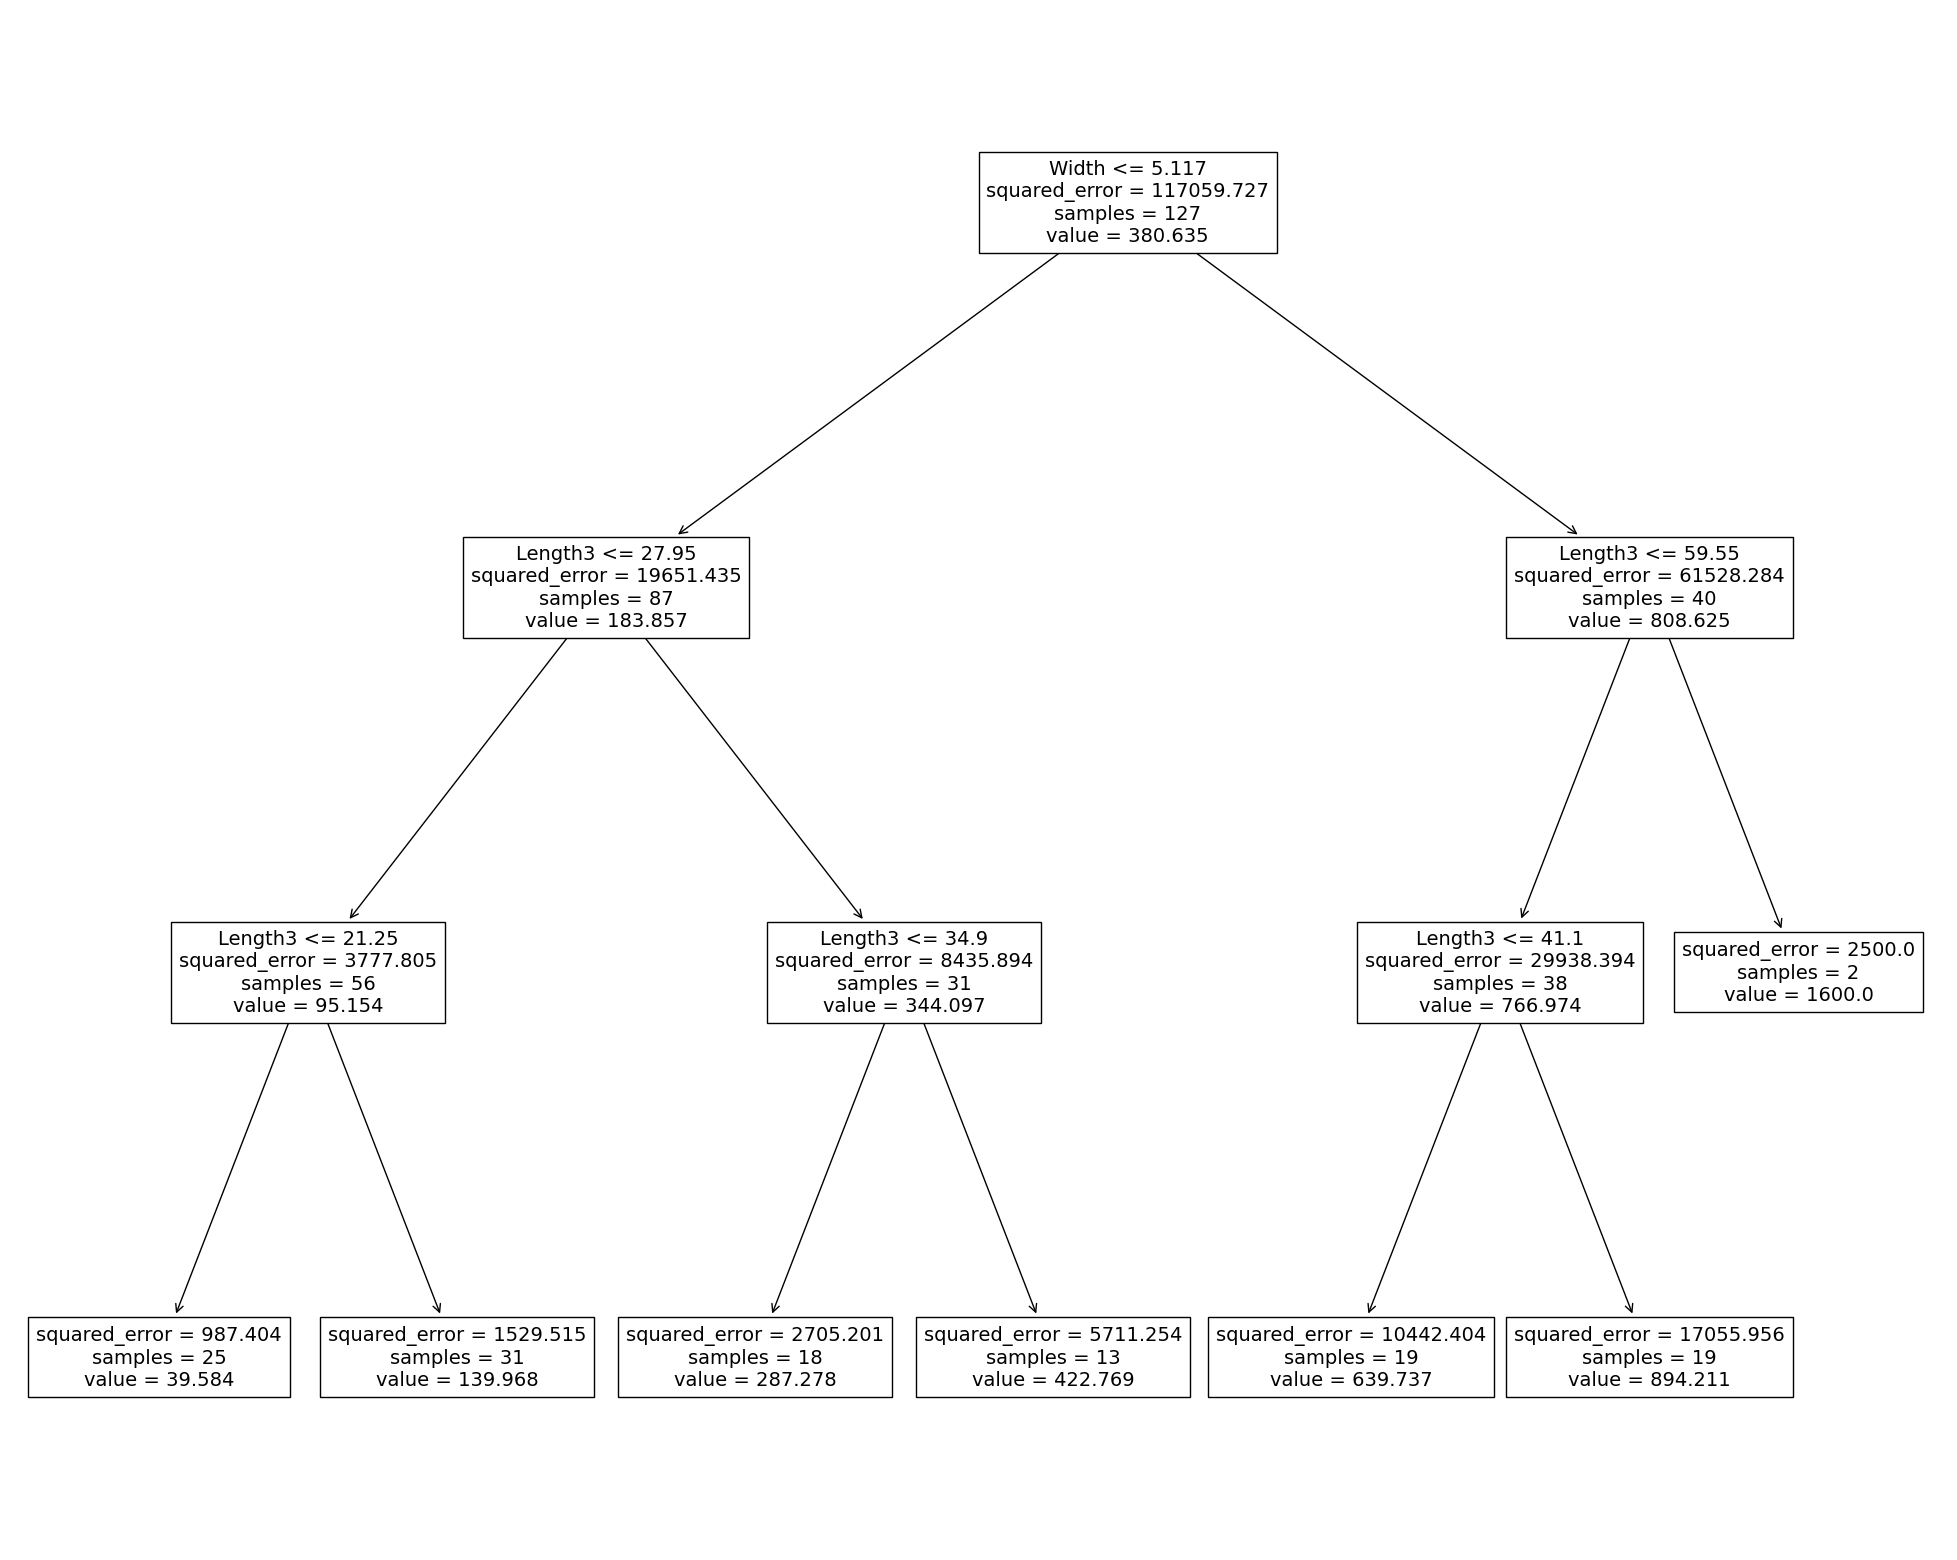

In [27]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree_picture= tree.plot_tree(reg_tree_model, feature_names=fish_market_num.columns, filled=False)

# plt.savefig("Fig_regression_tree.png")

### 3. 랜덤 포레스트 회귀

In [28]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 생성
rand_forest_model = RandomForestRegressor(n_estimators=50, max_depth=3)

# 모델을 훈련 데이터에 적합 
rand_forest_model.fit(fish_market_num, fish_market_label)

# 훈련 데이터 세트에 대한 예측 수행
predicted_weight_training_rf = rand_forest_model.predict(fish_market_num)

# 훈련 세트에 대한 평균 제곱 오차(MSE) 계산
mse_train_rf = mean_squared_error(fish_market_label, predicted_weight_training_rf)
print('\n랜덤 포레스트를 사용한 훈련 세트에 대한 평균 제곱 오차(MSE)=', mse_train_rf)

# 훈련 세트 평균 제곱근 오차(RMSE) 계산
root_mean_squared_error_train_rf = np.sqrt(mse_train_rf)
print('\n랜덤 포레스트를 사용한 훈련 세트에 대한 평균 제곱근 오차(RMSE)=', root_mean_squared_error_train_rf)

# 테스트 데이터 세트에 대한 예측 수행
predicted_weight_test_rf = rand_forest_model.predict(fish_market_num_test)

# 테스트 세트에 대한 평균 제곱 오차(MSE) 계산
mse_test_rf = mean_squared_error(fish_market_label_test, predicted_weight_test_rf)
print('\n랜덤 포레스트를 사용한 테스트 세트에 대한 평균 제곱 오차(MSE)=', mse_test_rf)

# 테스트 세트에 대한 평균 제곱근 오차(RMSE) 계산
root_mean_squared_error_test_rf = np.sqrt(mse_test_rf)
print('\n랜덤 포레스트를 사용한 테스트 세트에 대한 평균 제곱근 오차(RMSE)=', root_mean_squared_error_test_rf)

# 테스트 세트에 대한 R^2 점수 계산
print('\n$R^2$ 점수 =', r2_score(fish_market_label_test, predicted_weight_test_rf))



랜덤 포레스트를 사용한 훈련 세트에 대한 평균 제곱 오차(MSE)= 2737.509802887245

랜덤 포레스트를 사용한 훈련 세트에 대한 평균 제곱근 오차(RMSE)= 52.32121752107117

랜덤 포레스트를 사용한 테스트 세트에 대한 평균 제곱 오차(MSE)= 7377.0174149766435

랜덤 포레스트를 사용한 테스트 세트에 대한 평균 제곱근 오차(RMSE)= 85.88956522754462

$R^2$ 점수 = 0.9544572490414172


### 로지스틱 회귀 모델을 이용한 이진 분류 예제. 데이터 세트. 이 데이터 세트는 매우 유명하며 scikit-learn은 이를 다운로드하기 위한 코드를 제공합니다. 이진 분류 작업이므로 이미지가 숫자 '8'인지 아닌지를 분류할 것입니다.

> **참고: MNIST 데이터 세트는 이미 6만 개의 훈련 데이터(처음 6만 개)와 1만 개의 테스트 데이터(마지막 1만 개)로 나누어져 있습니다. 수동으로 분할할 필요가 없습니다.**

In [29]:
# Fetch the data 

from sklearn.datasets import fetch_openml

mnist_data=fetch_openml('mnist_784',version=1,data_home='data')

In [30]:
mnist_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [31]:
mnist_data.url

'https://www.openml.org/d/554'

In [37]:
# 데이터와 레이블 분리
X, y_true = mnist_data['data'], mnist_data['target']

# 데이터 정보 출력
print('\n레이블이 없는 데이터의 형태:', X.shape)
print('\n데이터의 각 특징 셀 데이터 유형:', type(X.iloc[1, 1]))
print('\n레이블의 형태:', y_true.shape)
print('\n레이블의 각 레이블 셀 데이터 유형:', type(y_true.iloc[1, ]))



레이블이 없는 데이터의 형태: (70000, 784)

데이터의 각 특징 셀 데이터 유형: <class 'numpy.int64'>

레이블의 형태: (70000,)

레이블의 각 레이블 셀 데이터 유형: <class 'str'>


In [38]:
import numpy as np  # NumPy 임포트

# 레이블 자료형 변환
y_true = y_true.astype(np.uint8)  # 'uint8' (0~255 범위의 부호 없는 정수) 으로 변환

# 변환 후 자료형 확인
print('\n레이블의 셀의 데이터형 변경 후:', type(y_true.iloc[1,]))



레이블의 셀의 데이터형 변경 후: <class 'numpy.uint8'>


In [42]:
# 훈련 데이터와 테스트 데이터 분리
X_train, X_test = X[:59999], X[60000:]  # 앞 59,999개는 훈련, 뒤 10,000개는 테스트
y_true_train, y_true_test = y_true[:59999], y_true[60000:]  # 레이블도 마찬가지로 분리

print('\n 훈련 데이터의 개수:', X_train.shape[0])
print('\n 테스트 데이터의 개수:', X_test.shape[0])


 훈련 데이터의 개수: 59999

 테스트 데이터의 개수: 10000


In [43]:
# For our binary classifier our target label is only 8:

y_true_train_8, y_true_test_8=(y_true_train==8), (y_true_test==8)

In [44]:
# Train our logistic regression model (this has cross validation built in within it)

from sklearn.linear_model import LogisticRegressionCV

clf_lr_model = LogisticRegressionCV(cv=5, random_state=0, max_iter=100)
clf_lr_model.fit(X_train, y_true_train_8)

# model accuracy on the whole training subset
clf_lr_model.score(X_train, y_true_train_8)

/Users/emjayahn/opt/anaconda3/envs/deepdive/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emjayahn/opt/anaconda3/envs/deepdive/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

0.9520992016533609

# Performance measures for classification models:

1. **Accuracy**: Percentage of times prediction model got the classification right.

2. **Confusion matrix**: Counting all true positives, false positives, true negatives, and false negatives.

| True Negative  | False Positive|
| -----------    | -----------   |
| **False Negative**| **True Positive** |


3. **Precision score**: Accuracy of positive predictions:

$$Precision=\frac{\text{true positives}}{\text{all predicted positives}}=\frac{\text{true positives}}{\text{true positives}+\text{false positives}}$$

4. **Recall score**: Ratio of the positive instances that are correctly classified:

$$Recall=\frac{\text{true positives}}{\text{all positives labels}}=\frac{\text{true positives}}{\text{true positives}+\text{false negatives}}$$

5. **$F_1$ score**: Only high when both precision and recall scores are both high:

$$F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$$

6. AUC (Area Under the Curve) and ROC (Receiver Operating Characteristics) curves: These curves provide a performance measure for a classification model at various threshold values.

In [45]:
# Let's use our trained model to make some predictions then evaluate it using different performance measures

from sklearn.model_selection import cross_val_predict

y_train_predict=cross_val_predict(clf_lr_model,X_train, y_true_train_8,cv=3)

/Users/emjayahn/opt/anaconda3/envs/deepdive/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emjayahn/opt/anaconda3/envs/deepdive/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab


 혼동 행렬:
 [[52898  1251]
 [ 1912  3938]]

 정규화된 혼동 행렬:
 [[0.97689708 0.02310292]
 [0.32683761 0.67316239]]

 정밀도: 0.7589130853729043

 재현율: 0.6731623931623931

 F1 점수: 0.7134704230455657


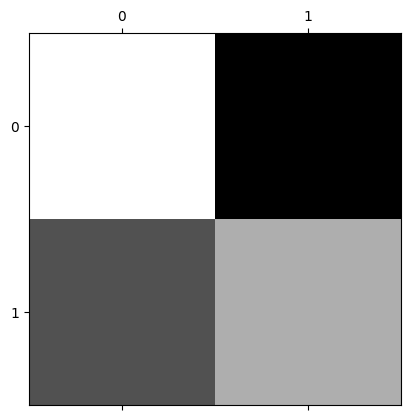

In [46]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 훈련 데이터에 대한 혼동 행렬 계산
conf_matrix = confusion_matrix(y_true_train_8, y_train_predict)

# 혼동 행렬 정규화 (각 행의 합으로 나누기)
row_totals = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_normalized = conf_matrix / row_totals

# 혼동 행렬 출력
print('\n 혼동 행렬:\n', conf_matrix)

# 정규화된 혼동 행렬 출력
print('\n 정규화된 혼동 행렬:\n', conf_matrix_normalized)

# 혼동 행렬 시각화 (회색 스케일 그래프)
plt.matshow(conf_matrix_normalized, cmap='gray')
plt.savefig('Fig_confusion_matrix_binary')  # 그래프 저장

# 정밀도 계산
print('\n 정밀도:', precision_score(y_true_train_8, y_train_predict))

# 재현율 계산
print('\n 재현율:', recall_score(y_true_train_8, y_train_predict))

# F1 점수 계산
print('\n F1 점수:', f1_score(y_true_train_8, y_train_predict))
